In [7]:
import pandas as pd
df = pd.read_csv('/kaggle/input/eeg-brainwave-dataset-feeling-emotions/emotions.csv')
print(df.columns)

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)


In [9]:
# Load CSV
df = pd.read_csv('/kaggle/input/eeg-brainwave-dataset-feeling-emotions/emotions.csv')

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

X = df.drop(columns=['label']).to_numpy().astype(np.float32)  
y = df['encoded_label'].values

print("Feature shape:", X.shape)  

Feature shape: (2132, 2549)


In [13]:
df = pd.read_csv('../input/eeg-brainwave-dataset-feeling-emotions/emotions.csv')
df.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b     label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00  NEGATIVE  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57   NEUTRAL  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00  POSITIVE  
3      299.0      132.0     -12.40       9.53       9.53     -12.40  POSITIVE  
4       12.0      119.0     -17.60      23.90      23.90     -17.60   NEUTRAL  

[5 rows x 2549 columns]

In [14]:
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col)

Classes are almost balanced. We can get away with the difference.
label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


<Axes: title={'center': 'Label'}, xlabel='label'>

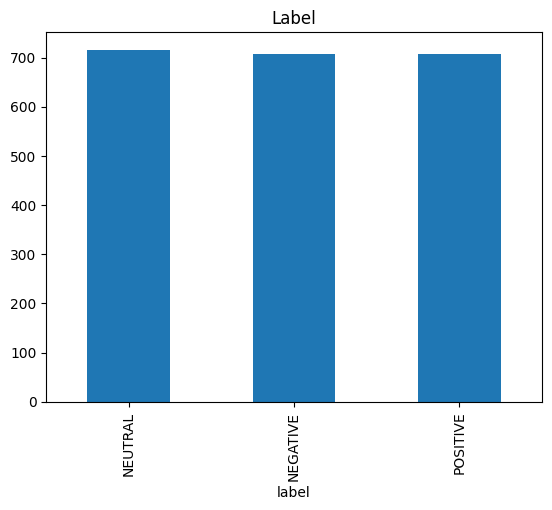

In [15]:
%matplotlib inline
print(f'Classes are almost balanced. We can get away with the difference.\n{df.label.value_counts()}')
df.label.value_counts().plot(kind='bar', color='tab:blue', title='Label')

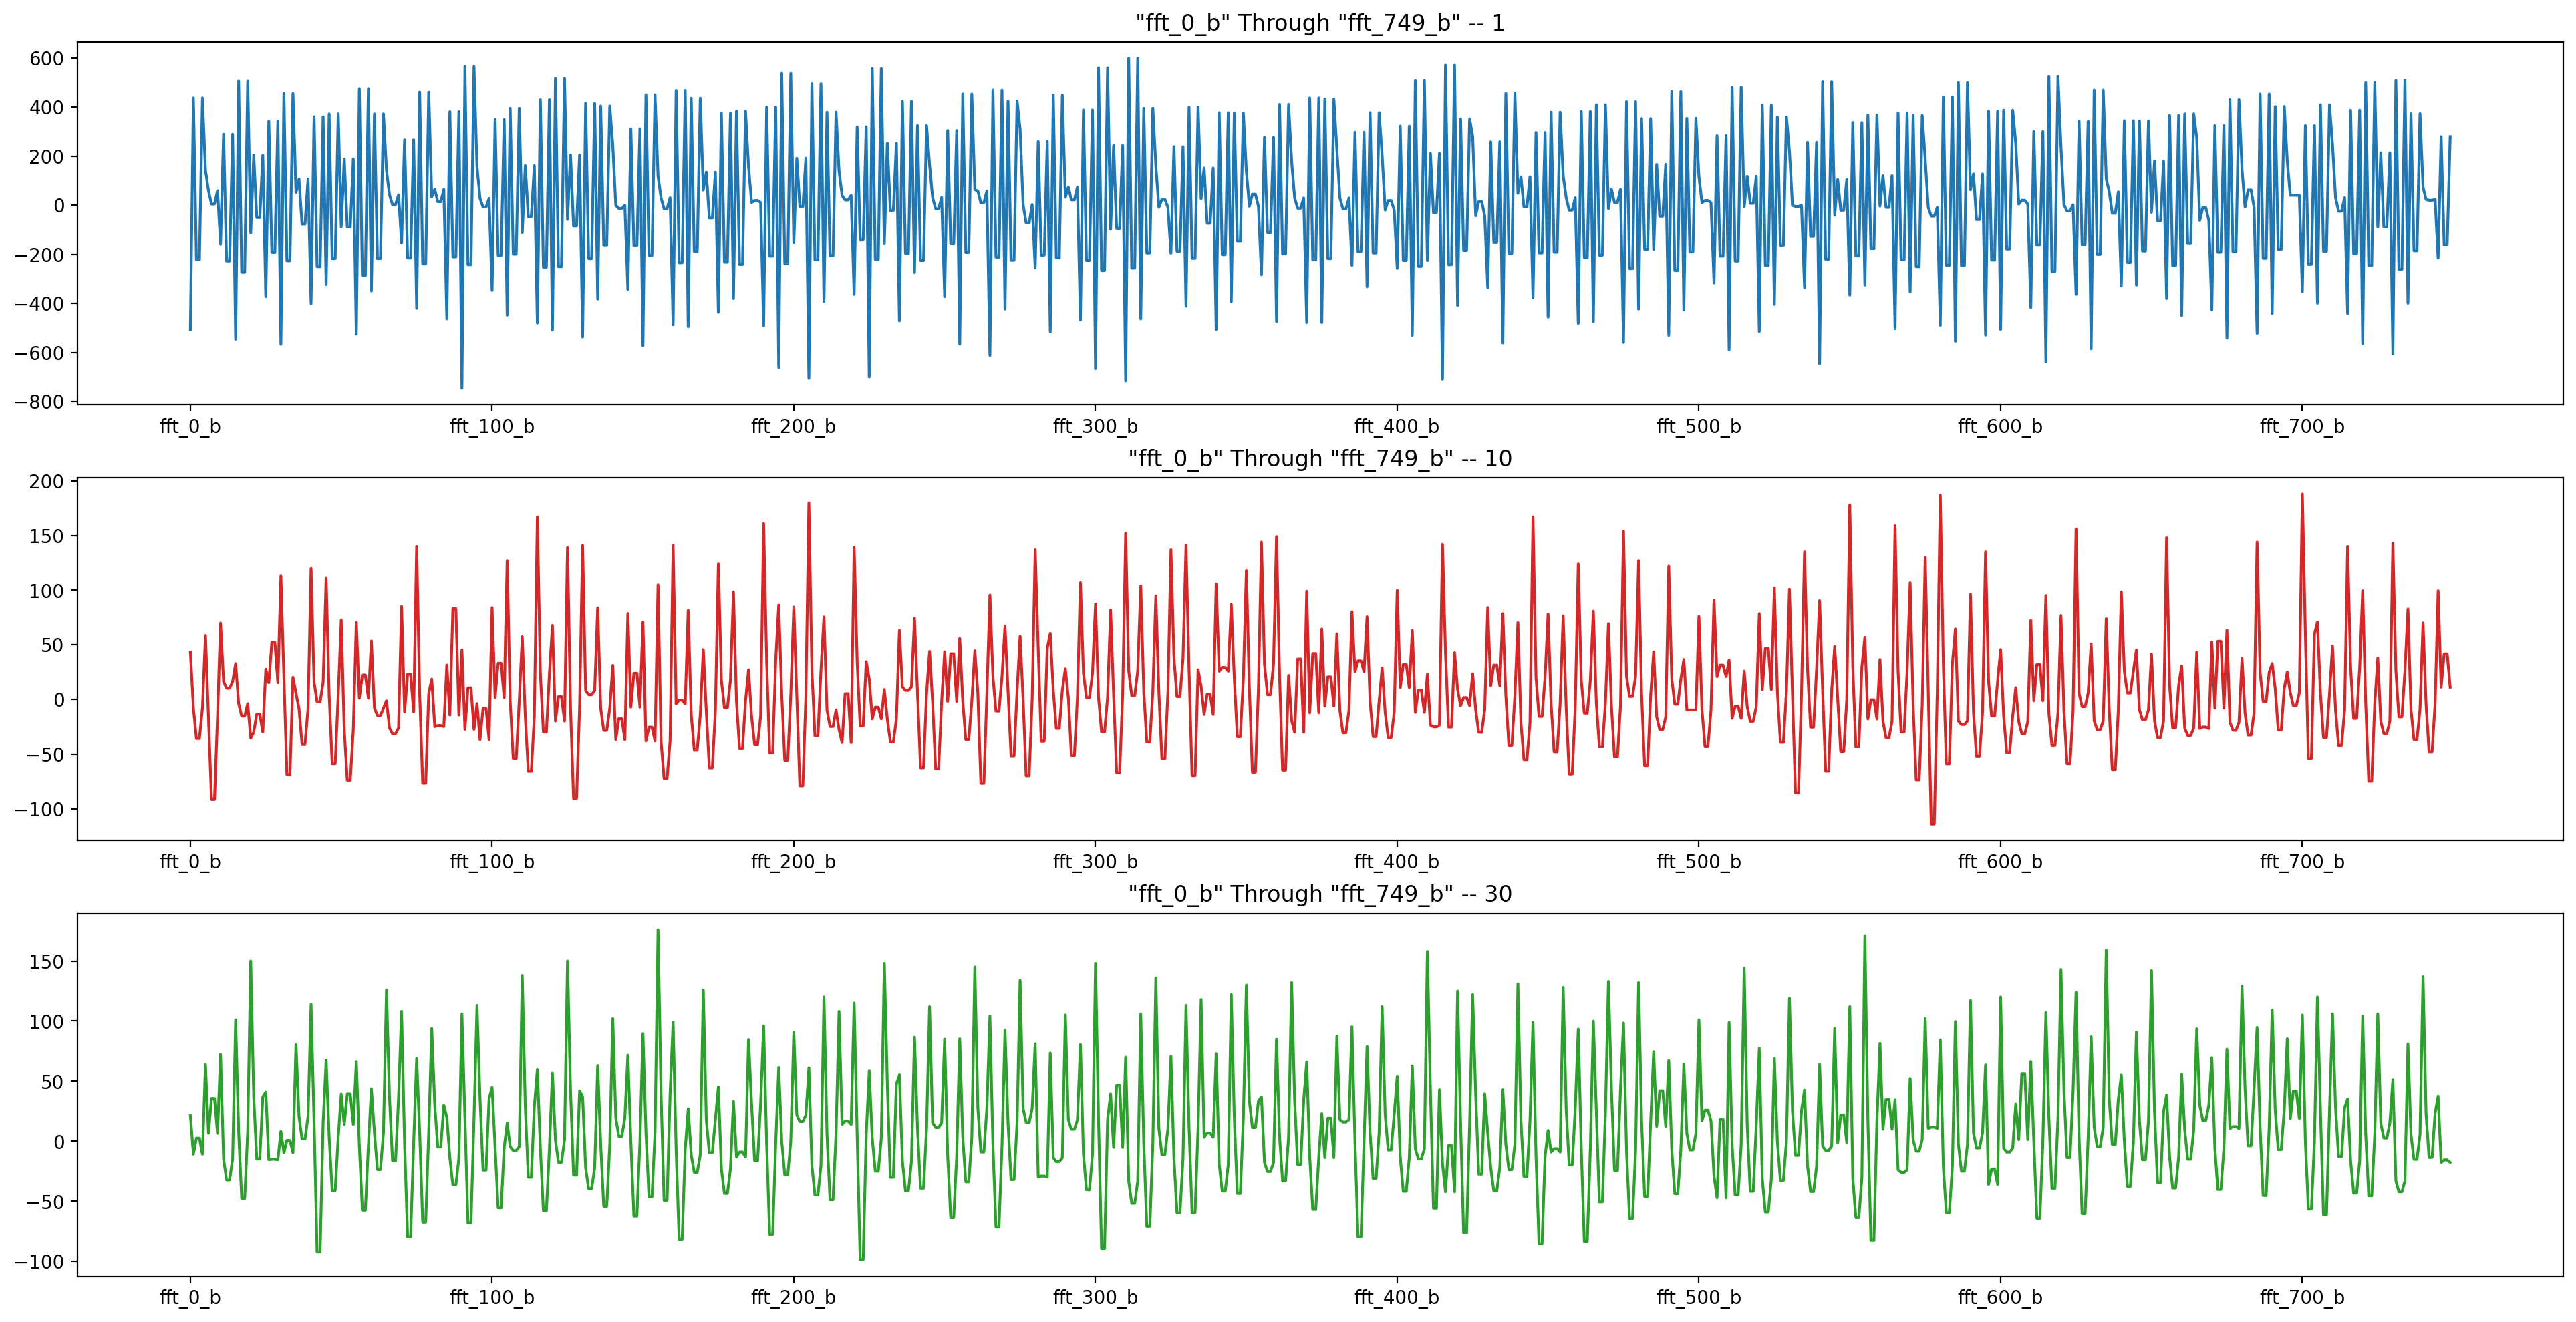

<Figure size 1200x3600 with 0 Axes>

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))
plt.figure(figsize = (12, 36))
df.loc[0, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 1', color='tab:blue', ax=axes[0])
df.loc[10, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 10', color='tab:red', ax=axes[1])
df.loc[30, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 30', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1, 
                    right=0.9, top=0.9, 
                    wspace=0.4, hspace=0.4)

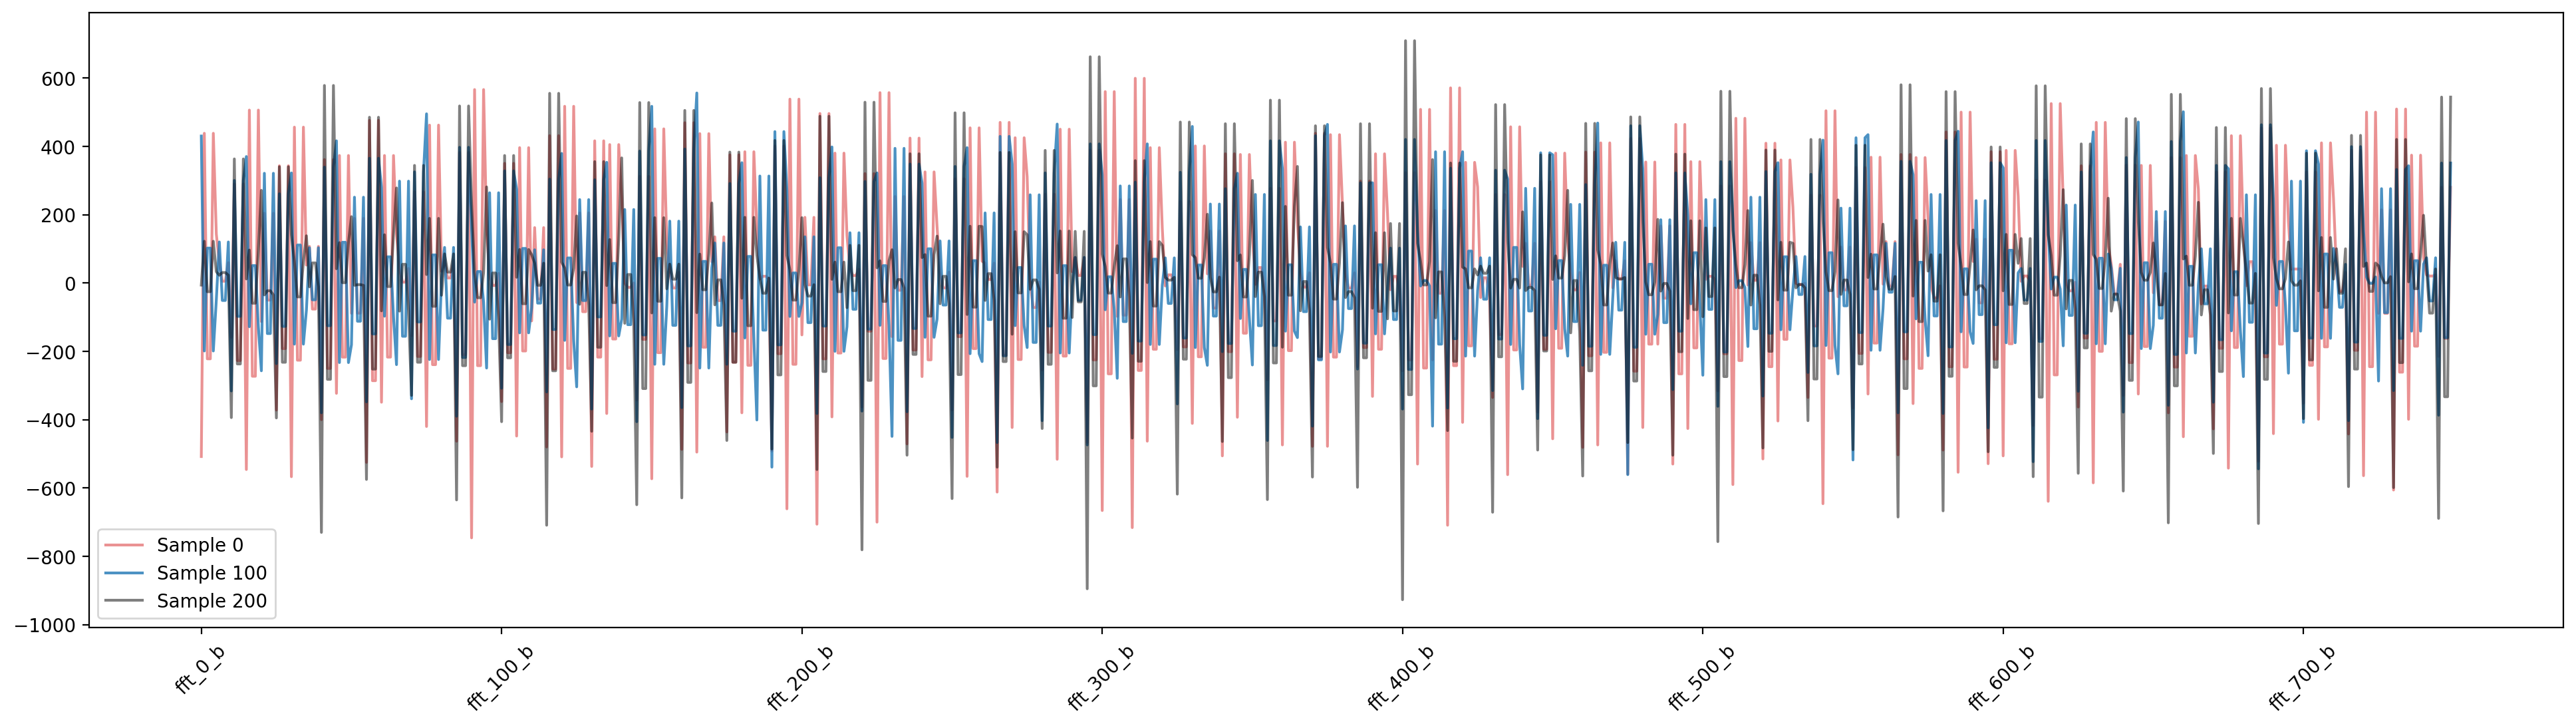

In [17]:
plt.figure(dpi=200, figsize=(24, 6))


plt.plot(df.loc[0, 'fft_0_b':'fft_749_b'], label='Sample 0', color='tab:red', alpha=.5)
plt.plot(df.loc[100, 'fft_0_b':'fft_749_b'], label='Sample 100', color='tab:blue', alpha=.8)
plt.plot(df.loc[200, 'fft_0_b':'fft_749_b'], label='Sample 200', color='black', alpha=.5)


plt.xticks(np.arange(0, len(df.loc[0, 'fft_0_b':'fft_749_b']) + 1, 100), rotation=45)
plt.legend(loc='best')

plt.show()

In [18]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b  label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00      0  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57      1  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00      2  
3      299.0      132.0     -12.40       9.53       9.53     -12.40      2  
4       12.0      119.0     -17.60      23.90      23.90     -17.60      1  

[5 rows x 2549 columns]

In [19]:
Y = df['label'].copy()
X = df.drop('label', axis=1).copy()

X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=111, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=111, test_size=0.3)

In [20]:
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
x_test = np.array(x_test).reshape((x_test.shape[0], x_test.shape[1],1))

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [23]:
pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 93.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.0 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [27]:
import sklearn
import scikeras
print("scikit-learn version:", sklearn.__version__)
print("scikeras version:", scikeras.__version__)


scikit-learn version: 1.2.2
scikeras version: 0.13.0


In [29]:
!pip install -U scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 61.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.2.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [46]:
Y = df['label'].copy()
X = df.drop('label', axis=1).copy()

X = StandardScaler().fit_transform(X)

X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=111, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=111, test_size=0.3)

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [47]:
i_dnn = Input(shape=(2548, ))

x_dnn = Dense(2548, activation='relu')(i_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(5096, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.3)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(2548, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

y_dnn = Dense(3, activation='softmax')(x_dnn)

dnn_model = Model(i_dnn, y_dnn)

dnn_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 2548)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2548)           │     6,494,852 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2548)           │        10,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2548)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3822)           │     9,742,278 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3822)           │        15,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3822)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5096)           │    19,482,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5096)           │        20,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3822)           │    19,480,734 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3822)           │        15,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3822)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2548)           │     9,741,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2548)           │        10,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2548)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │         7,647 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,019,867 (248.03 MB)

 Trainable params: 64,984,195 (247.90 MB)

 Non-trainable params: 35,672 (139.34 KB)

In [48]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_dnn_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
                                    
dnn_model.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])
        
dnn_h = dnn_model.fit(X_train, Y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=50,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/50


I0000 00:00:1751953034.534291     146 service.cc:148] XLA service 0x3b8293c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751953034.539940     146 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751953034.539960     146 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 7/33 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6692 - loss: 1.2475

I0000 00:00:1751953040.048013     146 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.7827 - loss: 2.2836
Epoch 1: val_accuracy improved from -inf to 0.87946, saving model to ./best_dnn_model.h5
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 262ms/step - accuracy: 0.7840 - loss: 2.2784 - val_accuracy: 0.8795 - val_loss: 18.2771 - learning_rate: 0.0010
Epoch 2/50
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8935 - loss: 0.4288
Epoch 2: val_accuracy did not improve from 0.87946
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8938 - loss: 0.4252 - val_accuracy: 0.5915 - val_loss: 30.6105 - learning_rate: 9.0484e-04
Epoch 3/50
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8996 - loss: 0.2750
Epoch 3: val_accuracy did not improve from 0.87946
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8995 - loss: 0.2736 - val_accuracy: 0.6027 - val_loss: 13.4188 - learning_rate: 8.1873e-04
Epoch 4/50
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9139 - loss: 0.2355
Epoch 4: val_accuracy improved from 0.87946 to

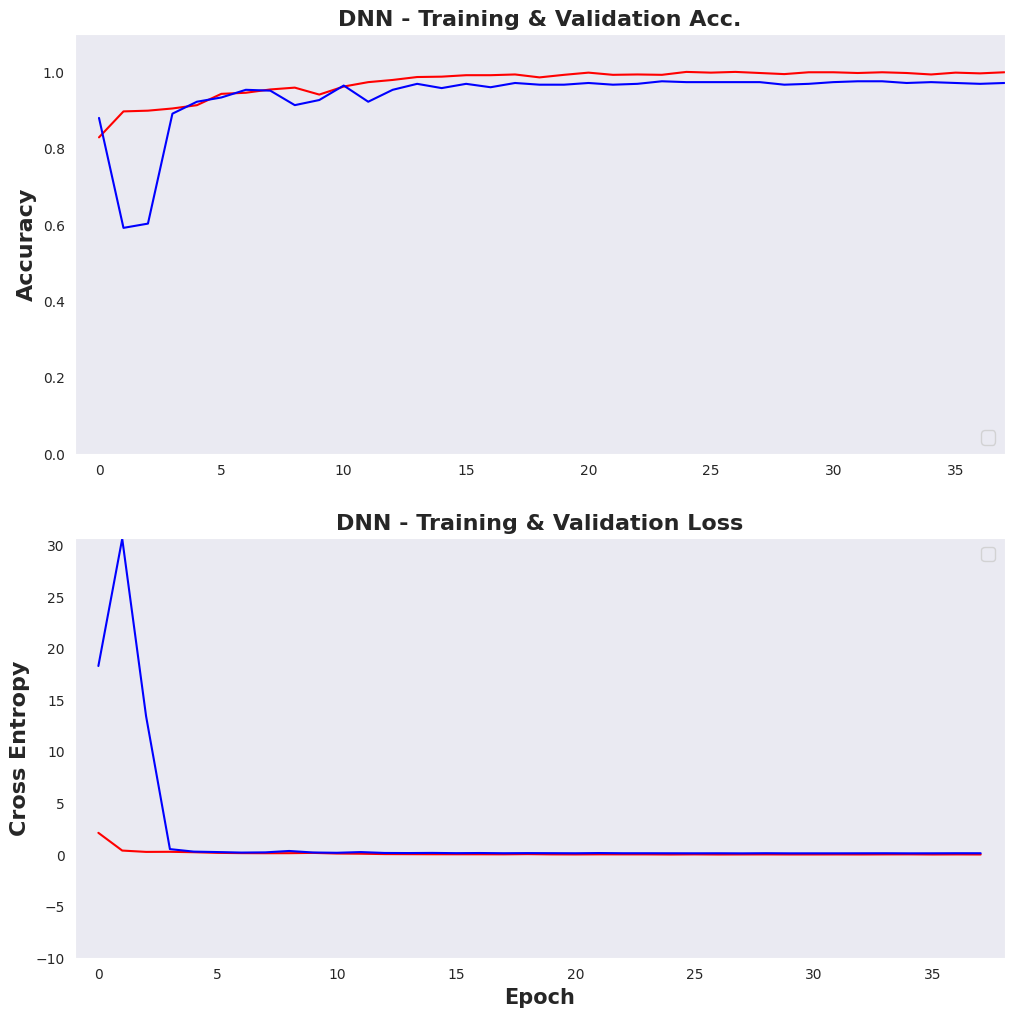

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Example history data (replace with your actual LSTM history)
acc = dnn_h.history['accuracy']
val_acc = dnn_h.history['val_accuracy']
loss = dnn_h.history['loss']
val_loss = dnn_h.history['val_loss']

epochs = np.arange(len(acc))  # Number of epochs

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Set up subplots for Accuracy
ax1.set_xlim(-1, len(epochs) - 1)
ax1.set_ylim(0, 1.1)  # Assuming accuracy values are between 0 and 1
ax1.set_title('DNN - Training & Validation Acc.', fontsize=16, weight='bold')
ax1.set_ylabel('Accuracy', fontsize=16, weight='bold')
ax1.legend(loc='lower right', fontsize=13)

# Set up subplots for Loss
ax2.set_xlim(-1, len(epochs))
ax2.set_ylim(-10, max(max(loss) + 0.1, max(val_loss)) + 0.1)
ax2.set_title('DNN - Training & Validation Loss', fontsize=16, weight='bold')
ax2.set_ylabel('Cross Entropy', fontsize=16, weight='bold')
ax2.set_xlabel('Epoch', fontsize=15, weight='bold')
ax2.legend(loc='upper right', fontsize=13)

# Create line objects for each plot
train_acc_line, = ax1.plot([], [], label='Training Accuracy', color='r')
val_acc_line, = ax1.plot([], [], label='Validation Accuracy', color='b')
train_loss_line, = ax2.plot([], [], label='Training Loss', color='r')
val_loss_line, = ax2.plot([], [], label='Validation Loss', color='b')

# Initialize function to set the data for each line
def init():
    train_acc_line.set_data([], [])
    val_acc_line.set_data([], [])
    train_loss_line.set_data([], [])
    val_loss_line.set_data([], [])
    return train_acc_line, val_acc_line, train_loss_line, val_loss_line

# Update function for each frame (epoch)
def update(epoch):
    x = epochs[:epoch + 1]
    
    train_acc_line.set_data(x, acc[:epoch + 1])
    val_acc_line.set_data(x, val_acc[:epoch + 1])
    train_loss_line.set_data(x, loss[:epoch + 1])
    val_loss_line.set_data(x, val_loss[:epoch + 1])
    
    return train_acc_line, val_acc_line, train_loss_line, val_loss_line

# Create the animation
ani = FuncAnimation(fig, update, frames=len(epochs), init_func=init, blit=True, repeat=False)

# Save the animation as a video (MP4)
ani.save('dnn_acc_loss_animation.mp4', writer='ffmpeg')

# Alternatively, to display in a Jupyter Notebook:
from IPython.display import HTML
HTML(ani.to_jshtml())

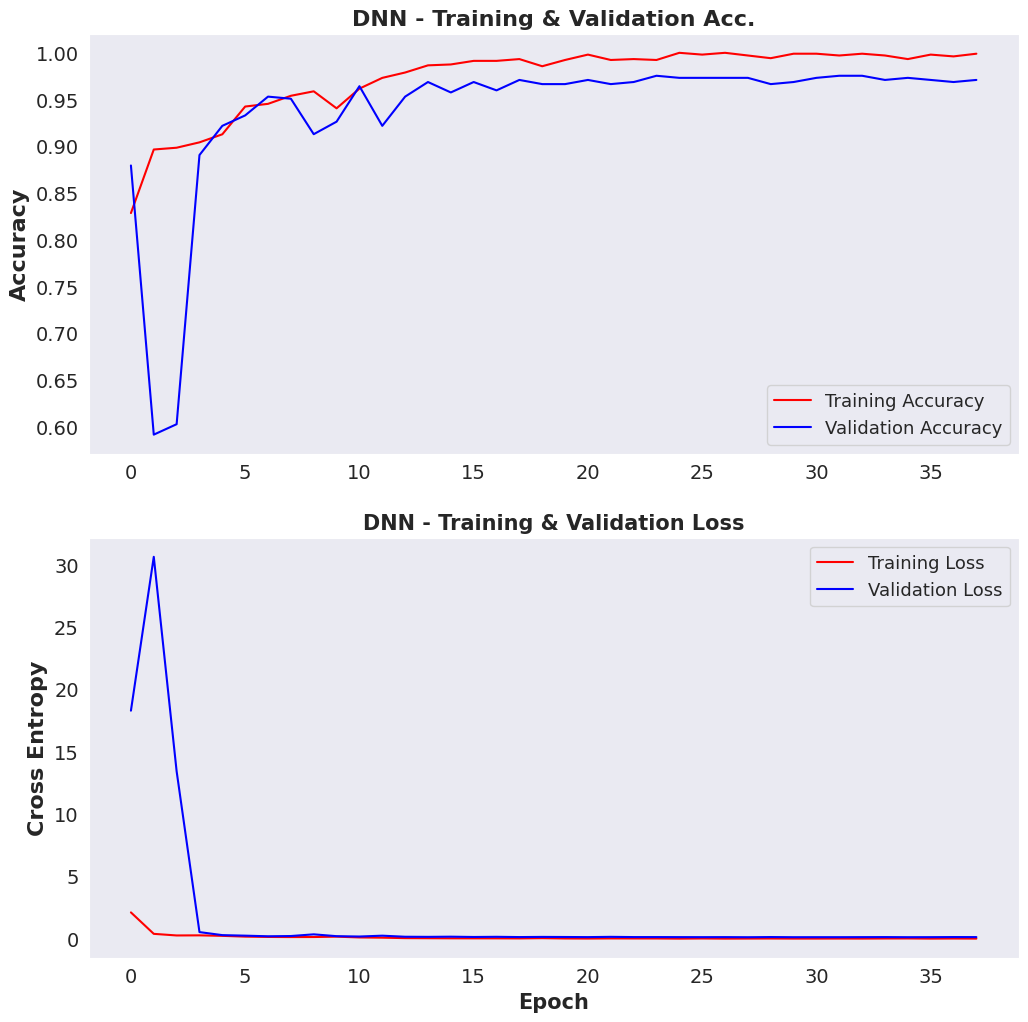

In [57]:
acc = dnn_h.history['accuracy']
val_acc = dnn_h.history['val_accuracy']

loss = dnn_h.history['loss']
val_loss = dnn_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [58]:
dnn_best = load_model('./best_dnn_model.h5')
dnn_acc = dnn_best.evaluate(x_test, y_test, verbose=0)[1]
print("Test Acc. DNN: {:.3f}%".format(dnn_acc * 100))

Test Acc. DNN: 97.812%


In [59]:
y_pred = np.array(list(map(lambda x: np.argmax(x), dnn_best.predict(x_test)))) 
cm = confusion_matrix(y_test.idxmax(axis=1), y_pred)
print(classification_report(y_test.idxmax(axis=1), y_pred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       190
           1       0.98      0.99      0.98       231
           2       0.97      0.96      0.97       219

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



Normalized confusion matrix


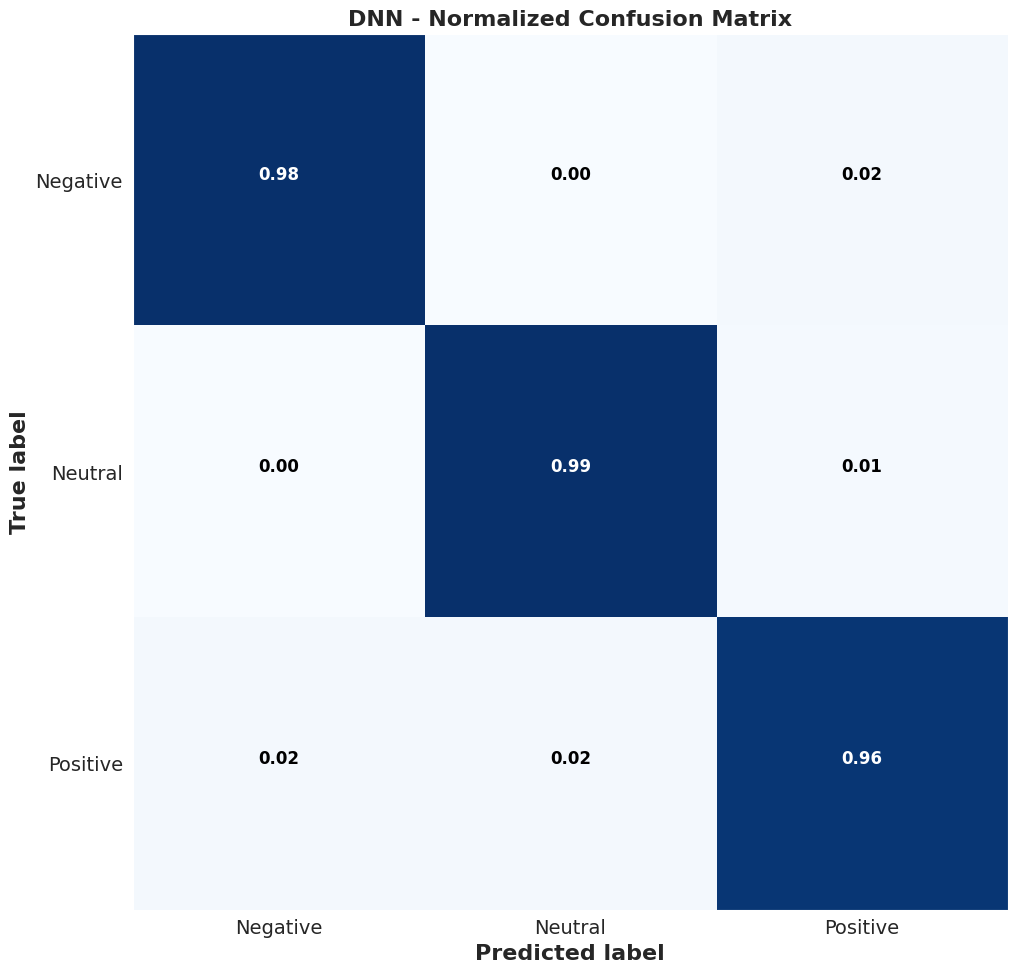

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

cnf_matrix = cm
np.set_printoptions(precision=2)

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Positive'], normalize=True,
                      title='DNN - Normalized Confusion Matrix')
plt.show()